In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [2]:
from collections import defaultdict
from random import uniform
from math import sqrt


def point_avg(points):
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0
        for p in points:
            dim_sum += p[dimension]

        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
    assignments = []
    for point in data_points:
        shortest = float('inf')
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if val < shortest:
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


def distance(a, b):
    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k, n):
    random.seed(n)
    centers = []
    for _ in range(k):
        centers.append(list(np.array(data_set)[np.random.randint(0, np.array(data_set).shape[0])]))
    
    return centers


def k_means(dataset, k, n=23):
    k_points = generate_k(dataset, k, n)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)
    return zip(assignments, dataset)

In [204]:
# points = [
#     [1, 2],
#     [2, 1],
#     [3, 1],
#     [5, 4],
#     [5, 5],
#     [6, 5],
#     [10, 8],
#     [7, 9],
#     [11, 5],
#     [14, 9],
#     [14, 14],
#     ]
# list(k_means(points, 3))

In [3]:
data = pd.read_csv("R15.txt", sep='\t', header=None, names=["x", "y", "class"])
data

,x,y,class
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1
3,9.730,9.910,1
4,9.754,10.430,1
...,...,...,...
595,14.198,4.804,15
596,14.320,4.590,15
597,13.636,5.218,15
598,14.410,4.656,15


In [4]:
X = data[["x", "y"]].values
y = data["class"].values

list(k_means(X, 15))

[(0, array([ 9.802, 10.132])),
 (1, array([10.35 ,  9.768])),
 (1, array([10.098,  9.988])),
 (1, array([9.73, 9.91])),
 (0, array([ 9.754, 10.43 ])),
 (1, array([9.836, 9.902])),
 (1, array([10.238,  9.866])),
 (1, array([9.53 , 9.862])),
 (1, array([10.154,  9.82 ])),
 (0, array([ 9.336, 10.456])),
 (0, array([ 9.378, 10.21 ])),
 (0, array([ 9.712, 10.264])),
 (0, array([ 9.638, 10.208])),
 (1, array([9.518, 9.956])),
 (1, array([10.236,  9.91 ])),
 (0, array([ 9.4  , 10.086])),
 (1, array([10.196,  9.746])),
 (1, array([10.138,  9.828])),
 (0, array([10.062, 10.26 ])),
 (1, array([10.394,  9.984])),
 (2, array([10.284, 10.348])),
 (1, array([9.706, 9.978])),
 (0, array([ 9.906, 10.588])),
 (1, array([10.356,  9.198])),
 (1, array([9.954, 9.704])),
 (0, array([ 9.796, 10.378])),
 (2, array([10.386, 10.608])),
 (1, array([10.41 ,  9.912])),
 (2, array([10.172, 10.598])),
 (1, array([10.286,  9.712])),
 (0, array([ 9.932, 10.234])),
 (1, array([10.298,  9.948])),
 (1, array([10.352,  9

In [8]:
y_pre = []
for i, (cls, data) in enumerate(k_means(X, 15)):
    y_pre.append(cls)
y_pre

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,


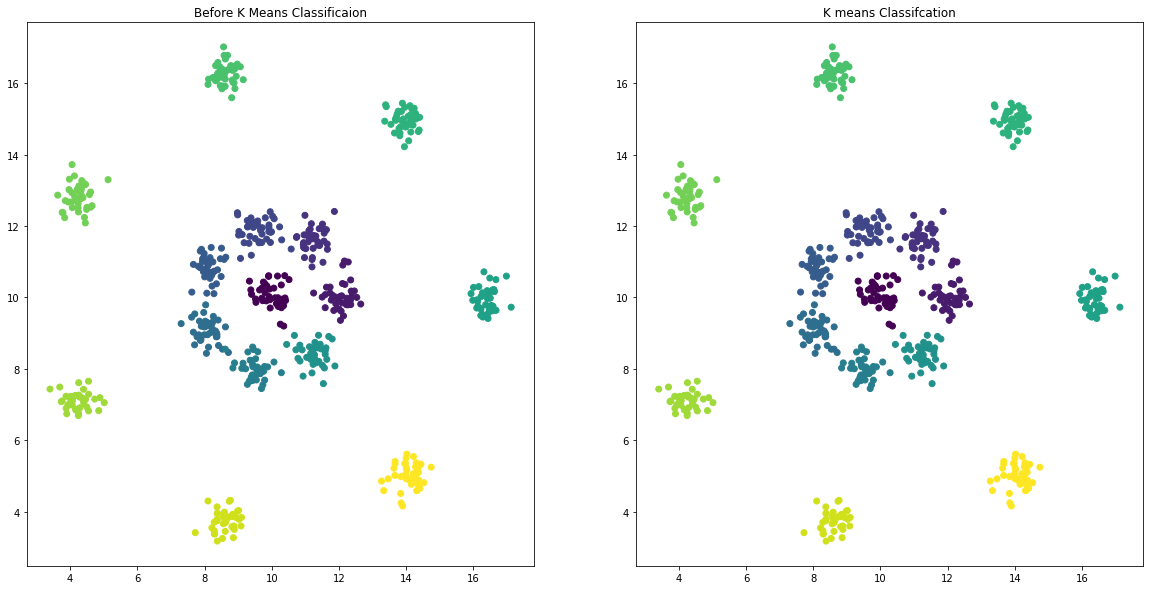

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.scatter(x=X[:, 0],y=X[:, 1],c=y)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=X[:, 0] ,y=X[:, 1],c=y_pre)
plt.title("K means Classifcation")
plt.show()

In [13]:
y_pre = np.array(y_pre)

In [20]:
y_pre[y_pre == 0] = 15
y_pre

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [242]:
data1 = pd.DataFrame(y_pre)
data1.to_csv("pre2.txt", index=None, header=None)

[[14.198, 4.804], [12.04, 10.028], [4.256, 7.612], [10.298, 9.948], [8.202, 9.232], [4.066, 12.514], [16.67, 10.498], [10.256, 9.25], [10.238, 9.866], [8.524, 16.392], [8.102, 4.3], [12.35, 9.798], [4.426, 12.238], [7.966, 10.72], [9.638, 10.208]]


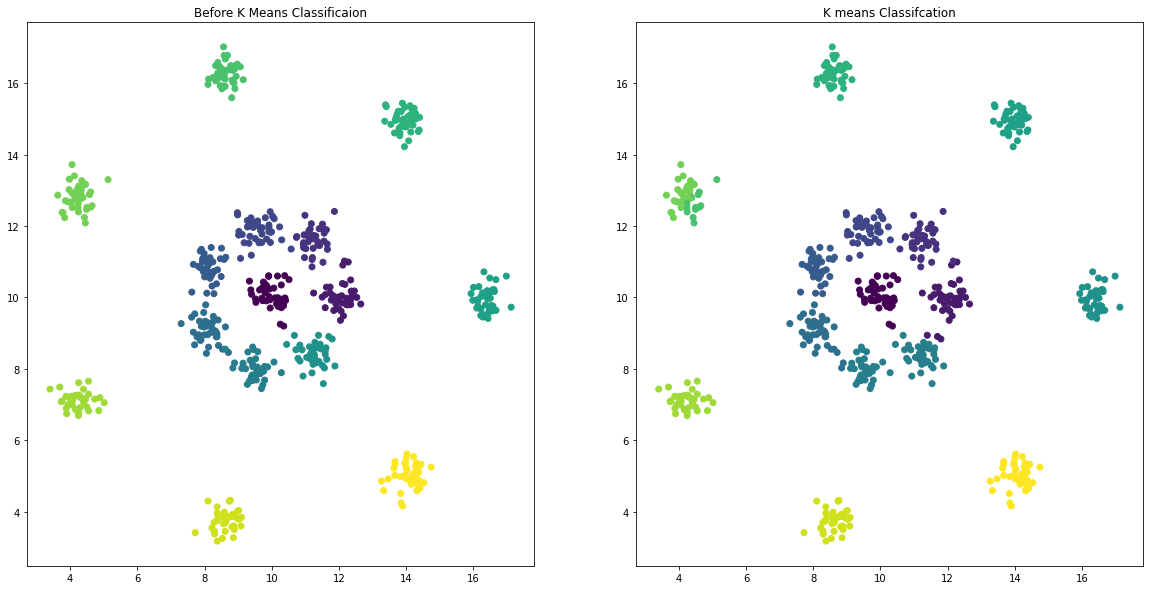

,0
0,15
1,15
2,15
3,15
4,15
...,...
595,14
596,14
597,14
598,14


In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from collections import defaultdict
from math import sqrt
import os.path


# 划入相应簇
def point_avg(points):
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0
        for p in points:
            dim_sum += p[dimension]

        new_center.append(dim_sum / float(len(points)))

    return new_center


# 更新簇中心
def update_centers(data_set, assignments):
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)

    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


# 判断距离，确定簇标记
def assign_points(data_points, centers):
    assignments = []
    for point in data_points:
        shortest = float('inf')
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if val < shortest:
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


# 计算距离
def distance(a, b):
    dimensions = len(a)

    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


# 确定初始均值向量
def generate_k(data_set, k, n):
    np.random.seed(n)
    centers = []
    for _ in range(k):
        centers.append(list(np.array(data_set)[np.random.randint(0, np.array(data_set).shape[0])]))

    return centers


# K-means
def k_means(dataset, k, n=23):
    k_points = generate_k(dataset, k, n)
    print(k_points)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)
    return zip(assignments, dataset)


# 读文件
data = pd.read_csv("R15.txt", sep='\t', header=None, names=["x", "y", "class"])
# print(data)
X = data[["x", "y"]].values
y = data["class"].values
# print(list(k_means(X, 15)))


# 实现
y_pre = []
for i, (cls, data) in enumerate(k_means(X, 15)):
    y_pre.append(cls)


# 可视化
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.scatter(x=X[:, 0],y=X[:, 1],c=y)
plt.title("Before K Means Classificaion")
plt.subplot(1,2,2)
plt.scatter(x=X[:, 0] ,y=X[:, 1],c=y_pre)
plt.title("K means Classifcation")
plt.show()

# 存入文件
y_pre = np.array(y_pre)
y_pre[y_pre == 0] = 15
data1 = pd.DataFrame(y_pre)
# data1.to_csv("pre2.txt", index=None, header=None)
data1

In [67]:
np.random.seed(23)

np.random.randint(0, 8)

3